In [92]:
import pandas as pd
import os
import numpy as np
from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd
from functools import reduce
%matplotlib inline

In [61]:
fhi = date(2018,11,1)
fhf = date(2019,10,1)

In [74]:
%%time
l = []
for k in range(rd(fhf,fhi).months+1):
    fh = fhi+rd(months=k)
    print(fh)
    df = pd.read_csv('data/%s.csv'%fh.strftime('%Y-%m'))
    df = df[['Ciclo_Estacion_Arribo','Genero_Usuario']]
    df = df.loc[df['Ciclo_Estacion_Arribo']!='32:11.8']
    df.reset_index(inplace=True,drop=True)
    df['Ciclo_Estacion_Arribo'] = df['Ciclo_Estacion_Arribo'].astype(int)
    df = df.groupby('Ciclo_Estacion_Arribo').count()
    df.reset_index(inplace=True)
    df.rename(columns={'Genero_Usuario':'n_viajes_%02d'%(12-k)},inplace=True)
    l.append(df)

2018-11-01


<string>:2: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
/home/jose/Documentos/phd/codigos/lib64/python3.6/site-packages/pandas/core/ops/array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


2018-12-01
2019-01-01
2019-02-01
2019-03-01


<string>:2: DtypeWarning: Columns (2,6,9) have mixed types.Specify dtype option on import or set low_memory=False.


2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
CPU times: user 10 s, sys: 402 ms, total: 10.4 s
Wall time: 10.5 s


In [75]:
%%time
df = reduce(lambda x,y:pd.merge(x,y,on='Ciclo_Estacion_Arribo',how='outer'),l)

CPU times: user 63 ms, sys: 1.01 ms, total: 64 ms
Wall time: 74.2 ms


In [76]:
var = sorted([v for v in df.columns if v[:2]=='n_'])

In [84]:
for v in var:
    df['d_%s'%v] = (~df[v].isnull()).astype(int)

In [89]:
df['apariciones'] = df[[v for v in df.columns if v[:2]=='d_']].sum(axis=1)

In [95]:
df.apariciones.describe(percentiles=np.arange(0,1,0.05))

count    484.000000
mean      11.919421
std        0.704698
min        2.000000
0%         2.000000
5%        12.000000
10%       12.000000
15%       12.000000
20%       12.000000
25%       12.000000
30%       12.000000
35%       12.000000
40%       12.000000
45%       12.000000
50%       12.000000
55%       12.000000
60%       12.000000
65%       12.000000
70%       12.000000
75%       12.000000
80%       12.000000
85%       12.000000
90%       12.000000
95%       12.000000
max       12.000000
Name: apariciones, dtype: float64

In [96]:
df = df.loc[df.apariciones==12]
df.reset_index(drop=True,inplace=True)

In [97]:
df.head()

,Ciclo_Estacion_Arribo,n_viajes_12,n_viajes_11,n_viajes_10,n_viajes_09,n_viajes_08,n_viajes_07,n_viajes_06,n_viajes_05,n_viajes_04,...,d_n_viajes_04,d_n_viajes_05,d_n_viajes_06,d_n_viajes_07,d_n_viajes_08,d_n_viajes_09,d_n_viajes_10,d_n_viajes_11,d_n_viajes_12,apariciones
0,1,6114.0,5586.0,6682.0,6259.0,6788.0,6357.0,7108.0,6382.0,6485.0,...,1,1,1,1,1,1,1,1,1,12
1,2,1626.0,1267.0,1745.0,1687.0,1915.0,1748.0,1998.0,2057.0,2077.0,...,1,1,1,1,1,1,1,1,1,12
2,3,2097.0,2008.0,2198.0,2208.0,2431.0,1833.0,2123.0,2027.0,2162.0,...,1,1,1,1,1,1,1,1,1,12
3,5,1957.0,1610.0,1786.0,2101.0,2365.0,2174.0,2266.0,2005.0,2086.0,...,1,1,1,1,1,1,1,1,1,12
4,6,2330.0,1838.0,2429.0,2515.0,2696.0,2564.0,2766.0,2557.0,2666.0,...,1,1,1,1,1,1,1,1,1,12


In [99]:
df.drop([v for v in df.columns if v[:2]=='d_'],axis=1,inplace=True)

In [100]:
df.shape

(472, 14)

In [106]:
for i,t in enumerate(list(zip(var[1:],var))):
    df['d_%d'%(i+1)] = (df[t[0]]-df[t[1]])/df[t[0]]

In [108]:
df['crec_prom'] = df[[v for v in df.columns if v[:2]=='d_']].mean(axis=1)

In [110]:
df = df[['Ciclo_Estacion_Arribo','crec_prom']]

In [112]:
df.sort_values('crec_prom',ascending=False,inplace=True)

/home/jose/Documentos/phd/codigos/lib64/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df.head(10)

,Ciclo_Estacion_Arribo,crec_prom
395,404,0.057695
222,230,0.015759
441,452,0.012489
359,368,0.011304
398,407,0.010403
340,349,0.010224
40,43,0.009860
187,195,0.007752
397,406,0.006844
217,225,0.006474


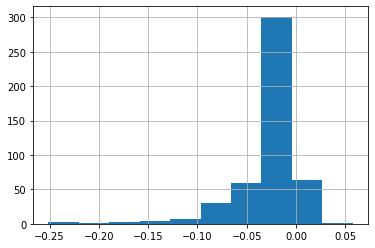

In [116]:
df.crec_prom.hist()

In [117]:
df.crec_prom.describe()

count    472.000000
mean      -0.027338
std        0.032023
min       -0.251232
25%       -0.033127
50%       -0.019188
75%       -0.009827
max        0.057695
Name: crec_prom, dtype: float64